In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import loadmat
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [25]:
import import_ipynb
try:
    os.chdir('C:\\Users\\hydro_leo\\Documents\\GitHub\\retina_python\\Modules')
except:
    os.chdir('Modules')
# from Spike_Generation import SG
from Spike_Generation import Spike_Time_Generater
from Spike_Generation import NL

# Information (R_info)

In [26]:
def R_info(rstate_trial, binnum, overlap = False):
    rstate_trial = np.array(rstate_trial)
    wordsCollection = []
    for rstate in rstate_trial:
        rstate[rstate>1] = 1
        if overlap:
            for i in np.arange(0,len(rstate)-binnum+1):
                wordsCollection.append(rstate[i:i+binnum])
        else:
            for i in np.arange(0,len(rstate)-binnum+1,binnum):
                wordsCollection.append(rstate[i:i+binnum])
    _, index = np.unique(np.array(wordsCollection), axis = 0, return_inverse=True)
    N, _ = np.histogram(index,bins=np.append(np.unique(index),max(index)))
    P = N/np.sum(N)
    totalEntropy = -np.sum(P*np.log2(P))

    trial_num = rstate_trial.shape[0]
    event_num = int(len(wordsCollection)/rstate_trial.shape[0])

    subEntropy = 0
    for i in range(event_num):
        subSet = []
        for j in range(trial_num):
            subSet.append(wordsCollection[event_num*j+i])
        _, index = np.unique(np.array(subSet), axis = 0, return_inverse=True)
        N, _ = np.histogram(index,bins=np.append(np.unique(index),max(index)))
        P = N/np.sum(N)
        subEntropy += -np.sum(P*np.log2(P))
    
    noiseEntropy = subEntropy/event_num
    return totalEntropy, noiseEntropy


In [49]:
dt = 0.01
restTime = 5
trial = 30

# Rest Trials (Spikes form Poison-Gamma process of a constant input)

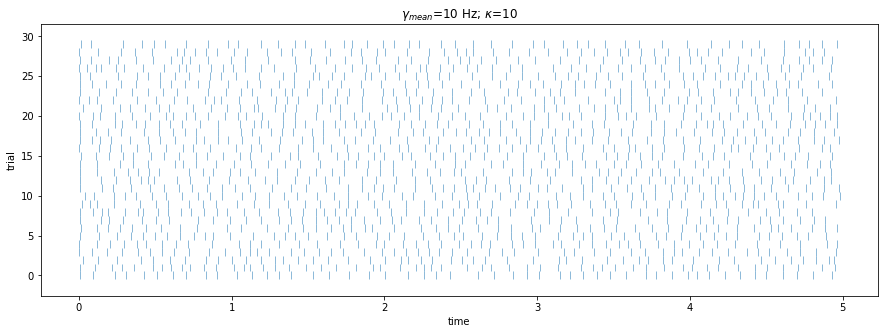

In [50]:
binLen = dt/10
binNum = 10

firingRate = 10
Gamma = 10

fig, ax = plt.subplots()
Spike_Trial = [0]*trial
rstate_Trial = [0]*trial
for ti in range(trial):
    Spike_Trial[ti] = Spike_Time_Generater( np.ones(int(restTime/dt)), dt, firingRate, Gamma)
    # rstate_Trial[ti], _ = np.histogram(Spike_Trial[ti], np.arange(int(restTime/binLen)+1)*binLen)
ax.eventplot(Spike_Trial, linewidths=0.5)
ax.set_title(r'$\gamma_{mean}$='+str(firingRate)+' Hz'+r'; $\kappa$='+str(Gamma))
ax.set_xlabel('time')
ax.set_ylabel('trial')
fig.set_size_inches(15, 5)

Text(0, 0.5, 'information (bit)')

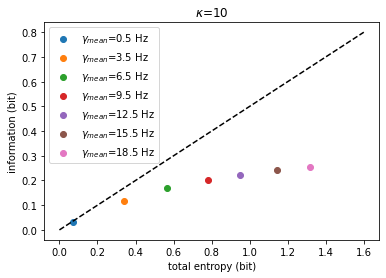

In [51]:
Gamma = 10
for firingRate in np.arange(0.5,20,3):
    Spike_Trial = [0]*trial
    rstate_Trial = [0]*trial
    for ti in range(trial):
        Spike_Trial[ti] = Spike_Time_Generater( np.ones(int(restTime/dt)), dt, firingRate, Gamma)
        rstate_Trial[ti], _ = np.histogram(Spike_Trial[ti], np.arange(int(restTime/binLen)+1)*binLen)

    totalEntropy, noiseEntropy = R_info(rstate_Trial, binNum) 
    plt.scatter(totalEntropy, totalEntropy-noiseEntropy, label = r'$\gamma_{mean}$='+str(firingRate)+' Hz')
plt.plot([0, 1.6], [0, 0.8], 'k--')
plt.legend(loc = 'best')
plt.title(r'$\kappa$='+str(Gamma))
plt.xlabel('total entropy (bit)')
plt.ylabel('information (bit)')

Text(0, 0.5, 'information (bit)')

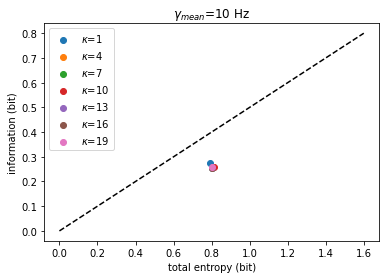

In [30]:
firingRate = 10
for Gamma in np.arange(1,20,3):
    Spike_Trial = [0]*trial
    rstate_Trial = [0]*trial
    for ti in range(trial):
        Spike_Trial[ti] = Spike_Time_Generater( np.ones(int(restTime/dt)), dt, firingRate, Gamma)
        rstate_Trial[ti], _ = np.histogram(Spike_Trial[ti], np.arange(int(restTime/binLen)+1)*binLen)

    totalEntropy, noiseEntropy = R_info(rstate_Trial, binNum)
    plt.scatter(totalEntropy, totalEntropy-noiseEntropy, label = r'$\kappa$='+str(Gamma))
plt.plot([0, 1.6], [0, 0.8], 'k--')
plt.legend(loc = 'best')
plt.title(r'$\gamma_{mean}$='+str(firingRate)+' Hz')
plt.xlabel('total entropy (bit)')
plt.ylabel('information (bit)')

## test by histogram

# varify Poison with variance-mean

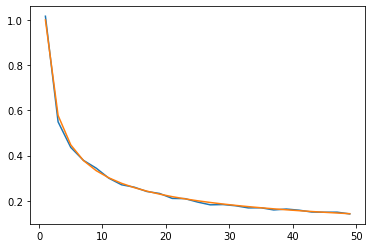

In [31]:
##verify Gamma Process by CV of intervals

ISI_CV = []
Gamma_list = np.arange(1,50,2)
for Gamma in Gamma_list:
    Spike = Spike_Time_Generater( np.ones(int(restTime/dt)*20), dt, 10, Gamma)
    ISI = np.diff(Spike)
    ISI_CV.append(np.std(ISI)/np.mean(ISI))

plt.plot(Gamma_list, ISI_CV)
plt.plot(Gamma_list, 1/np.sqrt(Gamma_list))

[0 1]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3 4]
[0 1 2 3]


Text(0.5, 1.0, '$\\kappa$=2; count window=0.05s')

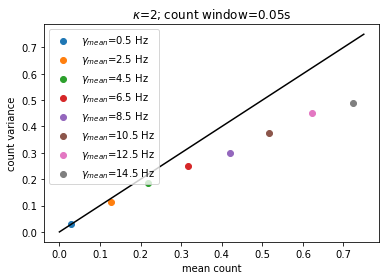

In [32]:
winSize = 0.05 # dt = 0.01
Gamma = 2
trial = 20
for firingRate in np.arange(0.5,15,2):
    rstate_Trial = [0]*trial
    for ti in range(trial):
        rstate_Trial[ti], _ = np.histogram(  Spike_Time_Generater( np.ones(int(restTime/dt)), dt, firingRate, Gamma)  , np.arange(int(restTime/winSize)+1)*winSize)

    print(np.unique(np.array(rstate_Trial).flatten()))
    plt.scatter( np.mean(np.array(rstate_Trial).flatten()), np.var(np.array(rstate_Trial).flatten()), label = r'$\gamma_{mean}$='+str(firingRate)+' Hz')

plt.plot([0, 15*winSize], [0, 15*winSize], 'k')
plt.xlabel('mean count')
plt.ylabel('count variance')
plt.legend(loc = 'best')
plt.title(r'$\kappa$='+str(Gamma)+'; count window='+str(winSize)+'s')

[0 1 2 3 4 5 6]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2]
[0 1 2 3]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]


Text(0.5, 1.0, '$\\gamma_{mean}$=10 Hz; count window=0.1s')

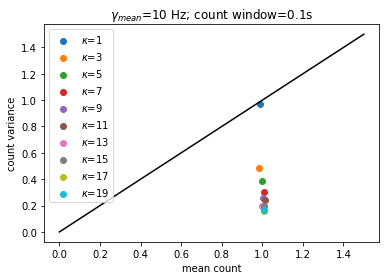

In [33]:
winSize = 0.1 # dt = 0.01

firingRate = 10
for Gamma in np.arange(1,20,2):
    rstate_Trial = [0]*trial
    for ti in range(trial):
        rstate_Trial[ti], _ = np.histogram(  Spike_Time_Generater( np.ones(int(restTime/dt)), dt, firingRate, Gamma)  , np.arange(int(restTime/winSize)+1)*winSize)

    print(np.unique(np.array(rstate_Trial).flatten()))
    plt.scatter( np.mean(np.array(rstate_Trial).flatten()), np.var(np.array(rstate_Trial).flatten()), label = r'$\kappa$='+str(Gamma))

plt.plot([0, 15*winSize], [0, 15*winSize], 'k')
plt.xlabel('mean count')
plt.ylabel('count variance')
plt.legend(loc = 'best')
plt.title(label = r'$\gamma_{mean}$='+str(firingRate)+' Hz'+'; count window='+str(winSize)+'s')

No handles with labels found to put in legend.


Text(0.5, 1.0, '$\\gamma_{mean}$=20 Hz; count window=1s')

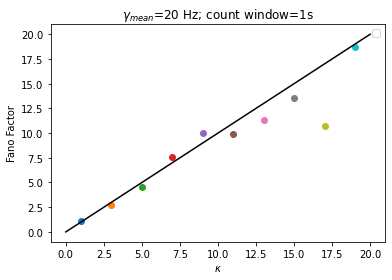

In [34]:
winSize = 1 # dt = 0.01

firingRate = 20
for Gamma in np.arange(1,20,2):
    rstate_Trial = [0]*trial
    for ti in range(trial):
        rstate_Trial[ti], _ = np.histogram(  Spike_Time_Generater( np.ones(int(restTime/dt)), dt, firingRate, Gamma)  , np.arange(int(restTime/winSize)+1)*winSize)

    plt.scatter( Gamma, np.mean(np.array(rstate_Trial).flatten())/np.var(np.array(rstate_Trial).flatten()))

plt.plot([0, 20], [0, 20], 'k')
plt.xlabel(r'$\kappa$')
plt.ylabel('Fano Factor')
plt.legend(loc = 'best')
plt.title(label = r'$\gamma_{mean}$='+str(firingRate)+' Hz'+'; count window='+str(winSize)+'s')

Text(0.5, 1.0, 'stimulus: LPOU')

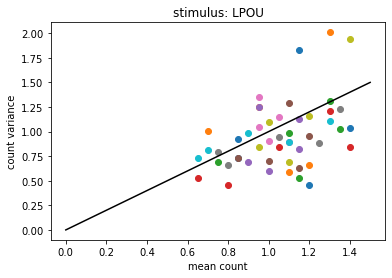

In [35]:
winSize = 0.1# dt = 0.01
firingRate = 10
Gamma = 1

rstate_Trial = [0]*trial
for ti in range(trial):
    rstate_Trial[ti], _ = np.histogram(  Spike_Time_Generater( np.ones(int(restTime*2/dt)), dt, firingRate, Gamma)  , np.arange(int(restTime/winSize)+1)*winSize)
for i in range(len(rstate_Trial[ti])):
    plt.scatter( np.mean(np.array(rstate_Trial)[:,i]), np.var(np.array(rstate_Trial)[:,i]))

plt.plot([0, 15*winSize], [0, 15*winSize], 'k')
plt.xlabel('mean count')
plt.ylabel('count variance')
plt.title('stimulus: LPOU')